<a href="https://colab.research.google.com/github/Arpiii2209/AirQualityMadrid/blob/main/1_Extracci%C3%B3n_y_transformaci%C3%B3n_de_los_datos_de_calidad_del_aire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

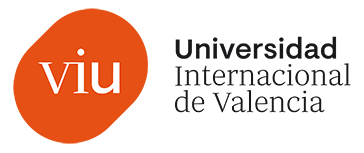

# **Análisis espacial de la calidad del aire en la Comunidad de Madrid**

## **Extracción, transformación y carga**

##### Autor: Arpita Jiménez Morán

El objetivo del notebook '*1. Extracción, transformación y carga de los datos de calidad del aire.ipynb*' es cargar y transformar los datos para su uso posterior en los archivos '*2. Análisis descriptivo de la calidad del aire.ipynb*' y '*3. Análisis predictivo de la calidad del aire.ipynb*'. Ambos archivos están dedicados al análisis descriptivo y predictivo respectivamente de los datos de calidad del aire.

Este será un archivo que ambos notebooks compartirán con el mismo conjunto de datos final llamado **'database_restructured_df'**, que actualmente se encuentra en el directorio del proyecto en el sistema de archivos, ya creado y arreglado.

(Este fichero ya esta completamente ejecutado con la creación y descarga de datos, por lo que este fichero se podría omitir y ya ejecutar directamente el fichero 2 y 3)

<a name="indice"></a>
## **Índice**

0. [Preliminares](#Preliminares)
1. [Descripción del dataset](#DescripciónDatos)
2. [Extracción de los datos](#Extracción)
3. [Exploración inicial de los datos](#Exploración)
4. [Transformación y carga de los datos](#Transformación)









<a name="Preliminares"></a>
## **Preliminares**
([Índice](#indice))

La ejecución de esta parte inicial de código nos permite acceder a los archivos y datos almacenados en Google Drive directamente desde el Notebook de Google Colab.

Se monta Google Drive en Colab para acceder a los archivos y directorios como si estuvieran almacenados localmente en la máquina virtual.

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Se establece el directorio raíz donde se encuentran los archivos y datos del proyecto.

In [3]:
BASE_FOLDER='/content/gdrive/MyDrive/TFM - Calidad del aire en la Comunidad de Madrid'

Se agrega el directorio a la lista de rutas donde Python buscará al intentar importar librerías en caso de necesitarlo.

In [4]:
import sys

In [5]:
sys.path.append(BASE_FOLDER)

Ahora sí, el entorno está preparado para importar las librerías que se encuentran en este directorio en caso de necesitarlo.

<a name="DescripciónDatos"></a>
## **Descripción del dataset**
([Índice](#indice))

EL Dataset que se va utilizar en este TFM consta de las siguientes columnas:

*   **Provincia**: Indica el valor de la provincia, en este caso con un valor único que es el entero 28 indicando así que pertenece a Madrid.
*   **Municipio**: Indica la el municipio de estudio de la calidad del aire, en este caso el valor entero 79 que es la Comunidad de Madrid.
*   **Estación**: Indica la estación donde se encuentra el medidor de la calidad del aire.
*   **Magnitud**: Indica el valor de la magnitud de estudio (En el
Cuadro 4.2 de la memoria del TFM aparecen todos los valores posibles de magnitud de estudio)
*  **Punto_Muestreo**: El campo punto de muestreo incluye el código de la estación completa (provincia, municipio y estación) más la magnitud y la técnica de muestreo.
*   **Mes**: Indica el valor del mes del registro.
*   **Año**: Indica el valor del año del registro.
*   **D(XX)**: Indica el día del mes del registro.
*   **V(XX)**: Indica si el registro del dato en campo día es validado o no y se puede usar ese día en el análisis.

(*) Números desde el 01 al 31 de manera creciente, indicando los dias del mes


<a name="Extracción"></a>
## **Extracción de los datos**
([Índice](#indice))

In [6]:
# Librerías
import os
import pandas as pd

Se verifica la disponibilidad de los datos visualizando los archivos de la carpeta.

In [7]:
data_folder = os.path.join(BASE_FOLDER, "data")

if os.path.exists(data_folder) and os.path.isdir(data_folder):
  csv_files = os.listdir(data_folder)

  print("Files in data folder:")
  for csv_file in csv_files:
      print(csv_file)
else:
    print("Data folder empty.")

Files in data folder:
datos01.csv
datos02.csv
datos03.csv
datos04.csv
datos05.csv
datos06.csv
datos07.csv
datos08.csv
datos09.csv
datos10.csv
datos11.csv
datos12.csv
datos13.csv
datos14.csv
datos15.csv
datos201612.csv
datos17.csv
datos201812.csv
datos201912.csv
datos202012.csv
datos202112.csv
datos202212.csv
datos202312.csv
transformed


Se genera un único archivo que contiene toda la información relacionada con la calidad del aire, consolidando los datos dispersos de varios archivos CSV en uno solo para facilitar su análisis y gestión.

In [8]:
if os.path.exists(data_folder) and os.path.isdir(data_folder):
  csv_files = [file for file in os.listdir(data_folder) if file.startswith("datos") and file.endswith('.csv')]

  if csv_files:
    dfs = []
    for csv_file in csv_files:
      file_path = os.path.join(data_folder, csv_file)
      df = pd.read_csv(file_path, sep=';')
      dfs.append(df)

  database_df = pd.concat(dfs, ignore_index=True)

In [9]:
display(database_df)

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,1,28079004_1_38,2001,1,17.0,V,15.0,...,19.0,V,17.0,V,35.0,V,40.0,V,53.0,V
1,28,79,4,1,28079004_1_38,2001,2,40.0,V,42.0,...,20.0,V,22.0,V,0.0,N,0.0,N,0.0,N
2,28,79,4,1,28079004_1_38,2001,3,19.0,V,18.0,...,14.0,V,15.0,V,17.0,V,20.0,V,19.0,V
3,28,79,4,1,28079004_1_38,2001,4,14.0,V,17.0,...,12.0,V,13.0,V,15.0,V,14.0,V,0.0,N
4,28,79,4,1,28079004_1_38,2001,5,10.0,V,11.0,...,11.0,V,15.0,V,16.0,V,15.0,V,18.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,28,79,60,14,28079060_14_6,2023,8,103.0,V,63.0,...,72.0,V,69.0,V,63.0,V,74.0,V,71.0,V
33354,28,79,60,14,28079060_14_6,2023,9,70.0,V,49.0,...,53.0,V,61.0,V,62.0,V,72.0,V,0.0,N
33355,28,79,60,14,28079060_14_6,2023,10,66.0,V,53.0,...,54.0,V,61.0,V,58.0,V,53.0,V,17.0,V
33356,28,79,60,14,28079060_14_6,2023,11,35.0,V,63.0,...,30.0,V,41.0,V,62.0,V,68.0,V,0.0,N


In [10]:
print(database_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33358 entries, 0 to 33357
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PROVINCIA       33358 non-null  int64  
 1   MUNICIPIO       33358 non-null  int64  
 2   ESTACION        33358 non-null  int64  
 3   MAGNITUD        33358 non-null  int64  
 4   PUNTO_MUESTREO  33358 non-null  object 
 5   ANO             33358 non-null  int64  
 6   MES             33358 non-null  int64  
 7   D01             33358 non-null  float64
 8   V01             33358 non-null  object 
 9   D02             33358 non-null  float64
 10  V02             33358 non-null  object 
 11  D03             33358 non-null  float64
 12  V03             33358 non-null  object 
 13  D04             33358 non-null  float64
 14  V04             33358 non-null  object 
 15  D05             33358 non-null  float64
 16  V05             33358 non-null  object 
 17  D06             33358 non-null 

<a name="Exploración"></a>
## **Exploración inicial de los datos**
([Índice](#indice))

Se procede a analizar los valores únicos de las columnas 'PROVINCIA', 'MUNICIPIO', 'ESTACIÓN' y 'MAGNITUD' para comprender la diversidad geográfica y la variedad de parámetros medidos en el conjunto de datos sobre la calidad del aire.

Se verifica que las columnas 'PROVINCIA' y 'MUNICIPIO' contienen solo un valor, donde 'PROVINCIA' indica Madrid y 'MUNICIPIO' la Comunidad de Madrid', lo que indica que pueden ser omitidas en análisis posteriores ya que proporciona información redundante.

In [11]:
provincia_values = database_df['PROVINCIA'].unique()
municipio_values = database_df['MUNICIPIO'].unique()
estacion_values = database_df['ESTACION'].unique()
magnitud_values = database_df['MAGNITUD'].unique()

print("Unique values for 'PROVINCIA' column:")
print(provincia_values)

print("Unique values for 'MUNICIPIO' column:")
print(municipio_values)

print("Unique values for 'ESTACION' column:")
print(estacion_values)

print("Unique values for 'MAGNITUD' column:")
print(magnitud_values)

Unique values for 'PROVINCIA' column:
[28]
Unique values for 'MUNICIPIO' column:
[79]
Unique values for 'ESTACION' column:
[ 4  8 11 16 17 18 24 35 36 38 39 40 27 47 54 57 58 59 48 49 50 55 56 60]
Unique values for 'MAGNITUD' column:
[ 1  6  7  8 12 10 14 20 30 35 42 43 44  9]


Se procede a verificar que la columna 'PUNTO_MUESTREO' se forma a partir de las columnas anteriores más la técnica de muestreo.

Por tanto, se corrobora la presencia de información redundante, y se planifica la transformación de esta columna. También se verifica que todos los 'PUNTO_MUESTREO' comiencen por '28079'.

In [12]:
punto_muestreo_values = database_df['PUNTO_MUESTREO'].unique()

print("Unique values for 'PUNTO_MUESTREO' column:")
print(punto_muestreo_values)

all_start_with_28079 = all(value.startswith('28079') for value in punto_muestreo_values)
print(all_start_with_28079)

Unique values for 'PUNTO_MUESTREO' column:
['28079004_1_38' '28079004_6_48' '28079004_7_8' '28079004_8_8'
 '28079004_12_8' '28079008_1_38' '28079008_6_48' '28079008_7_8'
 '28079008_8_8' '28079008_10_47' '28079008_12_8' '28079008_14_6'
 '28079008_20_59' '28079008_30_59' '28079008_35_59' '28079011_7_8'
 '28079011_8_8' '28079011_12_8' '28079016_6_48' '28079016_7_8'
 '28079016_8_8' '28079016_12_8' '28079016_14_6' '28079017_1_38'
 '28079017_7_8' '28079017_8_8' '28079017_12_8' '28079017_14_6'
 '28079018_1_38' '28079018_6_48' '28079018_7_8' '28079018_8_8'
 '28079018_10_47' '28079018_12_8' '28079018_14_6' '28079024_1_38'
 '28079024_6_48' '28079024_7_8' '28079024_8_8' '28079024_10_47'
 '28079024_12_8' '28079024_14_6' '28079024_20_59' '28079024_30_59'
 '28079024_35_59' '28079024_42_2' '28079024_43_2' '28079024_44_2'
 '28079035_1_38' '28079035_6_48' '28079035_7_8' '28079035_8_8'
 '28079035_12_8' '28079035_14_6' '28079036_1_38' '28079036_6_48'
 '28079036_7_8' '28079036_8_8' '28079036_10_47' '28079

<a name="Transformación"></a>
## **Transformación y carga de los datos**
([Índice](#indice))

In [13]:
# Librerías
import numpy as np
from datetime import datetime, timedelta
from tqdm import tqdm


Tras verificar que el punto de muestreo está formado por las columnas anteriores y la técnica, se procede a crear una nueva columna exclusivamente con la técnica asociada.

Para confirmar este proceso, se accede al informe de los Datos de Calidad del Aire de la Comunidad de Madrid ([texto del enlace](https://datos.madrid.es/FWProjects/egob/Catalogo/MedioAmbiente/Aire/Ficheros/Interprete_ficheros_%20calidad_%20del_%20aire_global.pdf)), donde se comprueba que para cada magnitud solo está asociada una técnica.

Por lo tanto, finalmente se puede concluir que esta columna se puede ignorar en el estudio y se procede a crear la columna 'TECNICA'.

In [14]:
database_df['TECNICA'] = database_df['PUNTO_MUESTREO'].apply(lambda x: x.split('_')[-1])
database_df.drop(columns=['PUNTO_MUESTREO'], inplace=True)
display(database_df)

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,ANO,MES,D01,V01,D02,V02,...,V27,D28,V28,D29,V29,D30,V30,D31,V31,TECNICA
0,28,79,4,1,2001,1,17.0,V,15.0,V,...,V,17.0,V,35.0,V,40.0,V,53.0,V,38
1,28,79,4,1,2001,2,40.0,V,42.0,V,...,V,22.0,V,0.0,N,0.0,N,0.0,N,38
2,28,79,4,1,2001,3,19.0,V,18.0,V,...,V,15.0,V,17.0,V,20.0,V,19.0,V,38
3,28,79,4,1,2001,4,14.0,V,17.0,V,...,V,13.0,V,15.0,V,14.0,V,0.0,N,38
4,28,79,4,1,2001,5,10.0,V,11.0,V,...,V,15.0,V,16.0,V,15.0,V,18.0,V,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,28,79,60,14,2023,8,103.0,V,63.0,V,...,V,69.0,V,63.0,V,74.0,V,71.0,V,6
33354,28,79,60,14,2023,9,70.0,V,49.0,V,...,V,61.0,V,62.0,V,72.0,V,0.0,N,6
33355,28,79,60,14,2023,10,66.0,V,53.0,V,...,V,61.0,V,58.0,V,53.0,V,17.0,V,6
33356,28,79,60,14,2023,11,35.0,V,63.0,V,...,V,41.0,V,62.0,V,68.0,V,0.0,N,6


En el código inferior se corrobora que actualmente hay una única técnica para cada mágnitud por lo que esta columna no proporciona información más que saber de que tipo es cada técnica usada en cada magnitud.

In [15]:
grouped_by_magnitud_tecnica_count = database_df.groupby(['MAGNITUD', 'TECNICA']).size().reset_index(name='count')
display(grouped_by_magnitud_tecnica_count)

,MAGNITUD,TECNICA,count
0,1,38,2384
1,6,48,2323
2,7,8,5336
3,8,8,5336
4,9,47,1250
5,10,47,2692
6,12,8,5336
7,14,6,3005
8,20,59,1192
9,30,59,1192


Para mejorar la comprensión del conjunto de datos, se procederá a transformar cada magnitud por su símbolo químico correspondiente.

In [16]:
magnitud_abreviatura_mapping = {1: 'SO2', 6: 'CO', 7: 'NO', 8: 'NO2', 9: 'PM2.5', 10: 'PM10', 12: 'NOx', 14: 'O3', 20: 'TOL', 30: 'BEN', 35: 'EBE', 37: 'MXY',
38: 'PXY', 39: 'OXY', 42: 'TCH', 43: 'CH4', 44: 'NMHC', 431: 'MPX'}

database_df['MAGNITUD'] = database_df['MAGNITUD'].map(magnitud_abreviatura_mapping)
display(database_df)

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,ANO,MES,D01,V01,D02,V02,...,V27,D28,V28,D29,V29,D30,V30,D31,V31,TECNICA
0,28,79,4,SO2,2001,1,17.0,V,15.0,V,...,V,17.0,V,35.0,V,40.0,V,53.0,V,38
1,28,79,4,SO2,2001,2,40.0,V,42.0,V,...,V,22.0,V,0.0,N,0.0,N,0.0,N,38
2,28,79,4,SO2,2001,3,19.0,V,18.0,V,...,V,15.0,V,17.0,V,20.0,V,19.0,V,38
3,28,79,4,SO2,2001,4,14.0,V,17.0,V,...,V,13.0,V,15.0,V,14.0,V,0.0,N,38
4,28,79,4,SO2,2001,5,10.0,V,11.0,V,...,V,15.0,V,16.0,V,15.0,V,18.0,V,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,28,79,60,O3,2023,8,103.0,V,63.0,V,...,V,69.0,V,63.0,V,74.0,V,71.0,V,6
33354,28,79,60,O3,2023,9,70.0,V,49.0,V,...,V,61.0,V,62.0,V,72.0,V,0.0,N,6
33355,28,79,60,O3,2023,10,66.0,V,53.0,V,...,V,61.0,V,58.0,V,53.0,V,17.0,V,6
33356,28,79,60,O3,2023,11,35.0,V,63.0,V,...,V,41.0,V,62.0,V,68.0,V,0.0,N,6


Si nos enfocamos en las columnas V(xx), podemos observar que la presencia de 'N' indica que el valor es siempre cero, lo cual está relacionado con la dinámica de años bisiestos y la variación de días en meses de 30 y 31 días.

Por consiguiente, al realizar la transformación final del conjunto de datos, se toma en consideración este contexto calendárico.

En consecuencia, procedemos a eliminar del dataset las columnas V(xx).

In [17]:
v_columns = database_df.filter(regex=r'^V', axis=1).columns
database_df.drop(columns=v_columns, inplace=True)
display(database_df)

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,ANO,MES,D01,D02,D03,D04,...,D23,D24,D25,D26,D27,D28,D29,D30,D31,TECNICA
0,28,79,4,SO2,2001,1,17.0,15.0,15.0,15.0,...,17.0,17.0,14.0,12.0,19.0,17.0,35.0,40.0,53.0,38
1,28,79,4,SO2,2001,2,40.0,42.0,38.0,29.0,...,42.0,27.0,21.0,22.0,20.0,22.0,0.0,0.0,0.0,38
2,28,79,4,SO2,2001,3,19.0,18.0,13.0,11.0,...,30.0,14.0,11.0,14.0,14.0,15.0,17.0,20.0,19.0,38
3,28,79,4,SO2,2001,4,14.0,17.0,13.0,10.0,...,10.0,9.0,11.0,12.0,12.0,13.0,15.0,14.0,0.0,38
4,28,79,4,SO2,2001,5,10.0,11.0,16.0,18.0,...,11.0,11.0,13.0,13.0,11.0,15.0,16.0,15.0,18.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,28,79,60,O3,2023,8,103.0,63.0,85.0,80.0,...,93.0,94.0,61.0,67.0,72.0,69.0,63.0,74.0,71.0,6
33354,28,79,60,O3,2023,9,70.0,49.0,42.0,46.0,...,54.0,62.0,55.0,56.0,53.0,61.0,62.0,72.0,0.0,6
33355,28,79,60,O3,2023,10,66.0,53.0,49.0,59.0,...,53.0,49.0,49.0,44.0,54.0,61.0,58.0,53.0,17.0,6
33356,28,79,60,O3,2023,11,35.0,63.0,53.0,61.0,...,46.0,27.0,27.0,32.0,30.0,41.0,62.0,68.0,0.0,6


El código posterior se encarga de crear un nuevo dataset que representa un calendario por cada estación única, desde el 1 de enero de 2001 hasta el 31 de diciembre de 2023.

Para cada día, se establece un valor inicial (NaN) por cada magnitud medida. Esto se hace teniendo en cuenta años bisiestos y la variación en días de los meses.

El proceso garantiza que tengamos una fila por cada día de cada mes para cada estación, facilitando futuros análisis de los datos.

In [18]:
unique_magnitudes = sorted(database_df['MAGNITUD'].unique())

# Create an empty list to store the data for the new DataFrame
rows = []

# Iterate over each station
for estacion in database_df['ESTACION'].unique():
  # Iterate over each year from 2001 to 2023
  for year in range(2001, 2024):
      # Determine if the year is a leap year
      leap_year = (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

      # Iterate over each month
      for month in range(1, 13):
          # Determine the number of days in the month
          if month in [4, 6, 9, 11]:
              days_in_month = 30
          elif month == 2:
              days_in_month = 29 if leap_year else 28
          else:
              days_in_month = 31

          # Iterate over each day in the month
          for day in range(1, days_in_month + 1):
              # Create a dictionary representing the row
              row = {
                  'ESTACION': estacion,
                  'ANO': year,
                  'MES': month,
                  'DIA': day
              }

              # Set NaN as initial value for each unique magnitude
              for magnitude in unique_magnitudes:
                  row[magnitude] = np.nan

              # Append the row to the list
              rows.append(row)

# Create the DataFrame from the list of dictionaries
database_restructured_df = pd.DataFrame(rows)

# Convert the ANO, MES, and DIA columns to integers
database_restructured_df[['ANO', 'MES', 'DIA']] = database_restructured_df[['ANO', 'MES', 'DIA']].astype(int)

# Display the restructured DataFrame
display(database_restructured_df)

,ESTACION,ANO,MES,DIA,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,SO2,TCH,TOL
0,4,2001,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,2001,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,2001,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2001,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2001,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201595,60,2023,12,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201596,60,2023,12,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201597,60,2023,12,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201598,60,2023,12,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Una vez que se ha creado el dataset inicial, es necesario rellenarlo con los valores del DataSet original.

Para hacerlo, se procede a recorrer cada una de las filas y, basándose en cada fila, se realiza una consulta al conjunto de datos original.

En el caso de que no se encuentren datos, lo cual puede ocurrir debido a la existencia de estaciones para meses y años sin información, o estaciones con solo una magnitud y otras no, se asigna el valor 'NaN'.

En el caso de existir el fichero, el código imprime que el archivo ya ha sido transformado y guardado previamente.

In [19]:
transformed_data_folder = os.path.join(data_folder, 'transformed')
database_restructured_path = os.path.join(transformed_data_folder, 'database_restructured.csv')

# Check if the final CSV file already exists
if os.path.exists(database_restructured_path):
  print("The data has already been transformed and saved.")
else:
  print("Transforming and saving the data...")

  # Create the transformed_data folder if it doesn't exist
  os.makedirs(transformed_data_folder, exist_ok=True)

  # Iterate over each row in database_restructured_df
  for index, row in tqdm(database_restructured_df.iterrows(), total=len(database_restructured_df), desc="Processing rows"):
    # Get the station, year, month, and day from the current row
    estacion = row['ESTACION']
    ano = row['ANO']
    mes = row['MES']
    dia = int(row['DIA'])

    # Iterate over each magnitude and fill the corresponding values
    for magnitude in unique_magnitudes:
      # Get the column name corresponding to the magnitude and day
      day_column = f'D{dia:02d}'

      # Select the corresponding row in df
      query = f'ESTACION == {estacion} and ANO == {ano} and MES == {mes} and MAGNITUD == "{magnitude}"'

      try:
        value = database_df.query(query)[day_column].values[0] if day_column in database_df.columns else np.nan
        # Update the value directly
        database_restructured_df.at[index, magnitude] = value
      except Exception as e:
        pass

    # Every 8400 rows, save a checkpoint
    if (index + 1) % 8400 == 0 or (index + 1) == len(database_restructured_df):
      chunk_index = index // 8400
      chunk_path = os.path.join(transformed_data_folder, f'database_restructured_chunk_{chunk_index + 1}.csv')
      start_row = chunk_index * 8400
      end_row = index + 1
      database_restructured_df.iloc[start_row:end_row].to_csv(chunk_path, index=False)
      print(f"Checkpoint saved at rows {start_row + 1} to {end_row}, saved as {chunk_path}")

  # Combine all chunk files into the final CSV
  chunk_files = [os.path.join(transformed_data_folder, f) for f in os.listdir(transformed_data_folder) if f.startswith('database_restructured_chunk_')]
  combined_df = pd.concat([pd.read_csv(f) for f in chunk_files], ignore_index=True)
  combined_df = combined_df.drop_duplicates()
  combined_df.to_csv(database_restructured_path, index=False)
  print("All chunks combined and saved as database_restructured.csv")

The data has already been transformed and saved.


In [20]:
# Read csv from generated file
database_restructured_df = pd.read_csv(database_restructured_path)
display(database_restructured_df)

,ESTACION,ANO,MES,DIA,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,SO2,TCH,TOL
0,4,2001,1,1,NaN,NaN,0.8,NaN,NaN,45.0,58.0,127.0,NaN,NaN,NaN,17.0,NaN,NaN
1,4,2001,1,2,NaN,NaN,0.5,NaN,NaN,12.0,60.0,78.0,NaN,NaN,NaN,15.0,NaN,NaN
2,4,2001,1,3,NaN,NaN,0.6,NaN,NaN,32.0,65.0,114.0,NaN,NaN,NaN,15.0,NaN,NaN
3,4,2001,1,4,NaN,NaN,0.5,NaN,NaN,29.0,63.0,108.0,NaN,NaN,NaN,15.0,NaN,NaN
4,4,2001,1,5,NaN,NaN,1.0,NaN,NaN,91.0,57.0,197.0,NaN,NaN,NaN,16.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201595,60,2023,12,27,NaN,NaN,NaN,NaN,NaN,50.0,60.0,137.0,19.0,23.0,NaN,NaN,NaN,NaN
201596,60,2023,12,28,NaN,NaN,NaN,NaN,NaN,67.0,59.0,163.0,19.0,30.0,NaN,NaN,NaN,NaN
201597,60,2023,12,29,NaN,NaN,NaN,NaN,NaN,68.0,60.0,164.0,15.0,28.0,NaN,NaN,NaN,NaN
201598,60,2023,12,30,NaN,NaN,NaN,NaN,NaN,33.0,49.0,99.0,21.0,18.0,NaN,NaN,NaN,NaN


Aqui podemos observar el dataset final donde para ciertos contaminantes existe valores 'NaN', por lo que dependiendo del tipo de análisis es preferible usar unos datos u otros.